In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
sns.set()


housing_data = pd.read_csv('/Users/vishesh.javangula@ibm.com/Downloads/kc_house_data.csv')

# Dataset Details

To make calculatations faster, I used a subset of 10,000 samples from the dataset, which roughly resembled the distribution of data. In order to determine the best feature I found the feature that had the highest correlation coefficient with price. According to the heatmap, this was sqft_living and grade. Ultimately grade was choosen due to minimal outliers across the values, which should help fit the linear model. Since the dataset is large I stuck with the classic 70/30 split. However, in order to minimize skewness in the training data I sampled 70% of the data from each grade. 

In [54]:
#general statisctics about each feature
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [55]:
housing_data.shape

(21613, 21)

(0.0, 4000000.0)

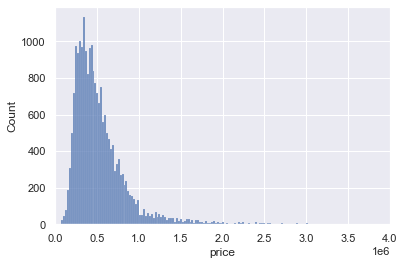

In [56]:
#How balanced is my dataset?
ax = sns.histplot(data = housing_data, x='price')
ax.set_xlim((0,4000000))

In [57]:
housing_data = housing_data.sample(10000)

In [58]:
# #using 70% of the data to reduce time complexity 
# temp = housing_data.groupby(pd.cut(housing_data['price'], 10))
# data = pd.DataFrame()
# for label, group in temp:
#         data = pd.concat([data,group.sample(n=int(0.6*group.shape[0]))])
# housing_data = data

In [59]:
housing_data.shape

(10000, 21)

(0.0, 4000000.0)

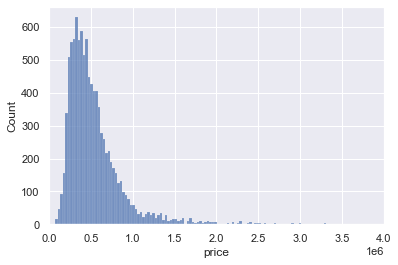

In [60]:
#How balanced is my subset?
ax = sns.histplot(data = housing_data, x='price')
ax.set_xlim((0,4000000))

In [61]:
#is all my data numerical and therefore useful? --> Yes
housing_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [62]:
housing_data['date'] = housing_data['date'].str.slice(stop=8).astype('int64')

<AxesSubplot:>

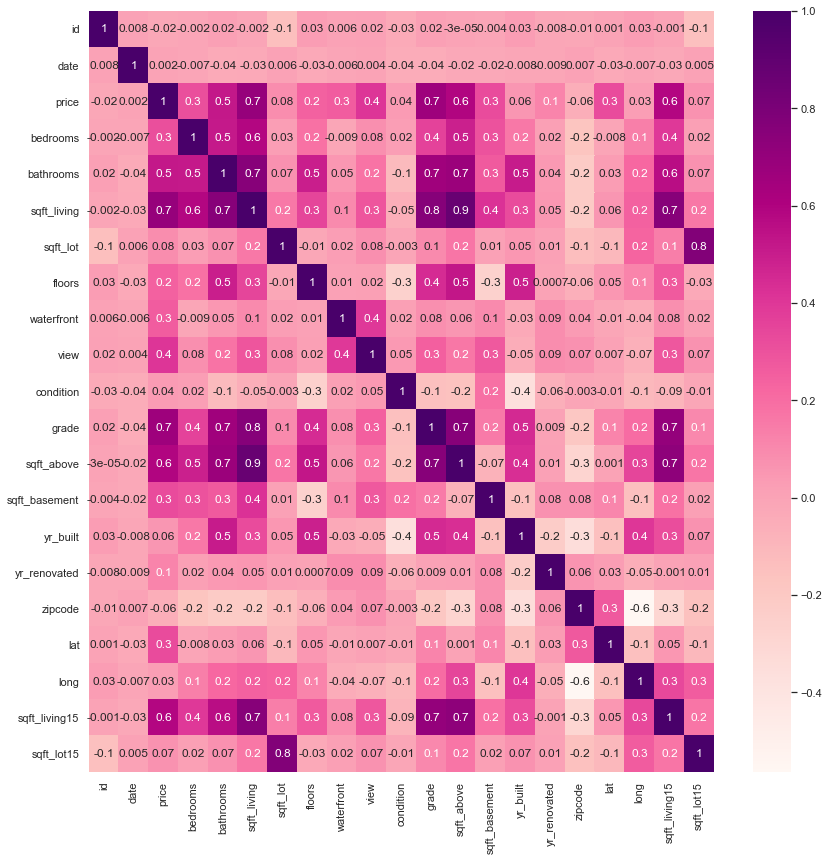

In [40]:
fig = plt.figure(figsize=(14,14))
ax = sns.heatmap(housing_data.corr(), cmap='RdPu', annot=True, fmt='.1g')
plt.axes(ax)


<AxesSubplot:xlabel='grade', ylabel='price'>

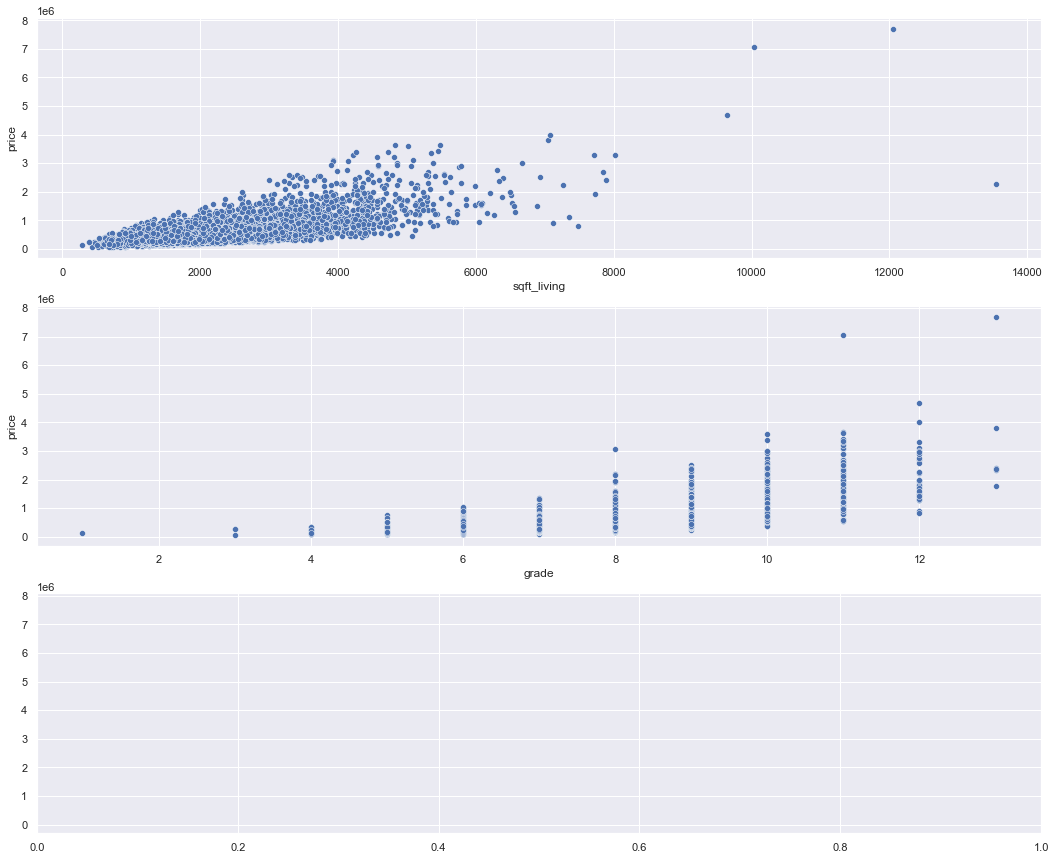

In [63]:
#We notice that sqft_living, and grade have the highest correlation, lets make a scatter plot to visualize this
fig, axes = plt.subplots(2,1, sharey=True, figsize=(18,15))
sns.scatterplot(ax=axes[0], data = housing_data, x='sqft_living', y='price')
sns.scatterplot(ax=axes[1], data = housing_data, x='grade', y='price')

In [64]:
#classic 70/30 random split but taking 70% of each bin to resemble distribution of test data
#of bins 
#we want to mimic the distribution of training data using stratificaiton by taking 
#70% of each histogram
#returned series can be used to group by
def trainTestSplit():
    #data = housing_data.groupby(pd.cut(housing_data['grade'], 13))
    data= housing_data.groupby(by='grade')
    train = pd.DataFrame()
    for label, group in data:
            train = pd.concat([train,group[['price', 'grade']].sample(n=int(0.71*group.shape[0]))])
    

    #create test set
    test = housing_data[['price', 'grade']].merge(train, how='left', indicator=True)
    test = test[test['_merge'] == 'left_only']
    
    #reset indicies
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    
    #create labels
    test_label = test['price'].to_frame()
    test.drop(columns=['_merge','price'], inplace=True)
    train_label = train['price'].to_frame()
    train.drop(columns=['price'], inplace=True)

    return (train, train_label, test, test_label)




# Algorithm Description

A Bias term was used in order to have an additional degree of freedom when fitting the line onto the data. As for optimization, MSE was used due to performing well on data with minimal outliers. Given the size of the training set (7000), mini-batch gradient descent was used to reduce computational cost. The batch size was 35 since it is divisible by 7000 and was found to perform well. Only one epoch was used due to the relative size of our training set. if loss does not have multiple local minmia, we will use mini-batch gradient descent, this is because our data set is large, but we also don't want to potentially miss our minimia. Due to using small batch sizes I decided to use a low learning rate of 0.05. due to the noise estimate of the error gradient. 

In [68]:
#starting parameter values
b1 = 0
b0 = 0

In [69]:
def hypothesis(x_batch):
    return x_batch.multiply(b1).add(b0)
    

In [70]:
#uses derivative of mean squared error, is differentiable which allows for gradient descent 
def getGradient(x_batch, y_batch):
    gradient_b0 = (y_batch['price'] - hypothesis(x_batch)['grade'])* -2/41
    gradient_b1 = -2/41 * x_batch['grade'] * (y_batch['price'] - hypothesis(x_batch)['grade'])
    return (gradient_b0.sum(), gradient_b1.sum())
        
    

In [71]:
def getError(y_true, y_pred):
    return (y_true['price'] - y_pred['grade']).pow(2).sum() / y_true.shape[0]

In [72]:
def getBatches(x_train, y_train):
    #batch size is 35 with training set of 7,000 samples for 173 batches
    n_batches = []
    for i in range(173):
        x_batch = x_train.iloc[41*i: 41*i + 41]
        y_batch = y_train.iloc[41*i: 41*i + 41]
        n_batches.append((x_batch, y_batch))
    return n_batches
        

In [73]:
#fits line onto data by calling gradient descent
#uses learning rates to determine optimal line, gradient decent for both parameters at a time

def fitAndScore():
    prev = int(round(time.time() * 1000))
    mse = []
    log = np.zeros(2)
    
    global b0
    global b1
    x_train, y_train, x_test, y_test = trainTestSplit()
    n_batches = getBatches(x_train, y_train)
    lr = 0.005
    
    plt.scatter(housing_data['grade'], housing_data['price'])
    
    for x_batch, y_batch in n_batches:
        #calculates new intercept 
        gradient_b0, gradient_b1 = getGradient(x_batch,y_batch)
        #calculates new intercept
        b0 = b0 - lr * gradient_b0

        #calculates new slope
        b1 = b1 - lr * gradient_b1      
        
        #new error
        mse.append(getError(y_test, b1*x_test+b0))
        
        #new coefficients 
        log[0] = b0
        log[1] = b1
        
        #print('b1 is now {} and b0 is now {}'.format(b1,b0))
    post = int(round(time.time() * 1000))
    x_val = np.array([i for i in range(14)])
    plt.plot(x_val,b1*x_val + b0)
    plt.xlim((0,14))
    plt.show()
    return (mse, post-prev)

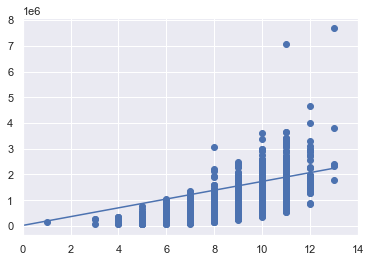

time to fit and score: 1153 ms


In [74]:
mse, t = fitAndScore()
print('time to fit and score: {} ms'.format(t))

# Algorithm Results and TC

Based off of our test set, we can see a declining MSE values from batch 10 to 150. While there was a sudden increse toward the last 25 batches, the overwhelming majority of batches saw a decline in MSE compared to the previous. According to the visualization above, the model may suffer at low and high grades but seems to perform well from grades 6-11. This may be because our model's prediction will be close to the average of the grade based on our training data. The time to train and score 175 batches was about 1153 ms. The time complexity of the model is O(N+M) where N is the size of the training set and M is the size of the test set. 



(198640976782.9289, 400000000000.0)

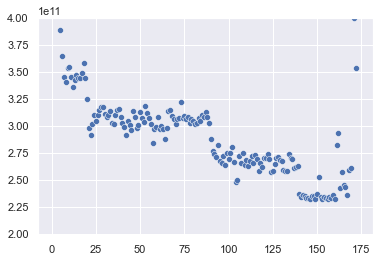

In [52]:
ax = sns.scatterplot(x = [i for i in range(1,174)], y=mse)
ax.set_ylim(top=0.4*pow(10,12))


# Sources
https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/